In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

X_raw = df['clean_comment']
y_raw = df['category'].map({-1: 2, 0: 0, 1: 1})  # remap labels for multi-class

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)
max_features = 7000
tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance on training set
# -----------------------------
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define base learners with tuned parameters
# -----------------------------
lightgbm_model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    random_state=42
)

xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

svm_model = SVC(
    C=1.13,
    kernel='linear',
    probability=True,  # required for stacking
    random_state=42
)

# -----------------------------
# 6️⃣ Define meta-learner
# -----------------------------
meta_learner = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 7️⃣ Stacking Classifier
# -----------------------------
stacking_model = StackingClassifier(
    estimators=[
        ('lightgbm', lightgbm_model),
        ('xgboost', xgb_model),
        ('svm', svm_model)
    ],
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    n_jobs=1  # Avoid parallel issues with SVM
)

# -----------------------------
# 8️⃣ Train stacking model
# -----------------------------
stacking_model.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 9️⃣ Predict and evaluate
# -----------------------------
y_pred = stacking_model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


c:\Users\apoor\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.402793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170580
[LightGBM] [Info] Number of data points in the train set: 36914, number of used features: 5446
[LightGBM] [Info] Start training from score -1.161819
[LightGBM] [Info] Start training from score -1.073625
[LightGBM] [Info] Start training from score -1.063295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

c:\Users\apoor\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.237358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135355
[LightGBM] [Info] Number of data points in the train set: 29531, number of used features: 4531
[LightGBM] [Info] Start training from score -1.161790
[LightGBM] [Info] Start training from score -1.073598
[LightGBM] [Info] Start training from score -1.063347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

c:\Users\apoor\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\apoor\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2529
           1       0.90      0.86      0.88      3154
           2       0.79      0.76      0.78      1650

    accuracy                           0.87      7333
   macro avg       0.86      0.86      0.86      7333
weighted avg       0.87      0.87      0.87      7333



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

X_raw = df['clean_comment']
y_raw = df['category'].map({-1: 2, 0: 0, 1: 1})  # remap labels

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)
max_features = 7000
tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance on training set
# -----------------------------
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define base learner (LightGBM)
# -----------------------------
lightgbm_model = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    random_state=42
)

# -----------------------------
# 6️⃣ Define meta-learner (Logistic Regression)
# -----------------------------
meta_learner = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 7️⃣ Stacking Classifier
# -----------------------------
stacking_model_1 = StackingClassifier(
    estimators=[
        ('lightgbm', lightgbm_model)
    ],
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    n_jobs=1
)

# -----------------------------
# 8️⃣ Train stacking model
# -----------------------------
stacking_model_1.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 9️⃣ Predict and evaluate
# -----------------------------
y_pred = stacking_model_1.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.299394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170580
[LightGBM] [Info] Number of data points in the train set: 36914, number of used features: 5446
[LightGBM] [Info] Start training from score -1.161819
[LightGBM] [Info] Start training from score -1.073625
[LightGBM] [Info] Start training from score -1.063295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

X_raw = df['clean_comment']
y_raw = df['category'].map({-1: 2, 0: 0, 1: 1})  # remap labels

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)
max_features = 7000
tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance on training set
# -----------------------------
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define base learner (Logistic Regression)
# -----------------------------
base_lr = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 6️⃣ Define meta-learner (LightGBM)
# -----------------------------
meta_lgbm = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    random_state=42
)

# -----------------------------
# 7️⃣ Stacking Classifier
# -----------------------------
stacking_model_2 = StackingClassifier(
    estimators=[
        ('logistic', base_lr)
    ],
    final_estimator=meta_lgbm,
    cv=5,
    stack_method='predict_proba',
    n_jobs=1
)

# -----------------------------
# 8️⃣ Train stacking model
# -----------------------------
stacking_model_2.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 9️⃣ Predict and evaluate
# -----------------------------
y_pred = stacking_model_2.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 36914, number of used features: 3
[LightGBM] [Info] Start training from score -1.161819
[LightGBM] [Info] Start training from score -1.073625
[LightGBM] [Info] Start training from score -1.063295
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2529
           1       0.91      0.86      0.89      3154
           2       0.73      0.80      0.76      1650

    accuracy                           0.86      7333
   macro avg       0.84      0.85      0.84      7333
weighted avg       0.86      0.86      0.86      7333



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

# Remap class labels: -1 → 2, 0 → 0, 1 → 1
df['category'] = df['category'].map({-1: 2, 0: 0, 1: 1})

X_raw = df['clean_comment']
y_raw = df['category']

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)  # Trigrams
max_features = 7000   # Can adjust as needed

tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance with SMOTE (training set only)
# -----------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define Logistic Regression model
# -----------------------------
model = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 6️⃣ Train the model
# -----------------------------
model.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 7️⃣ Predict and evaluate
# -----------------------------
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0,1,2]))


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2529
           1       0.92      0.86      0.89      3154
           2       0.81      0.78      0.80      1650

    accuracy                           0.88      7333
   macro avg       0.87      0.87      0.86      7333
weighted avg       0.88      0.88      0.87      7333



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# -----------------------------
# 1️⃣ Load dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

X_raw = df['clean_comment']
y_raw = df['category'].map({-1: 2, 0: 0, 1: 1})  # remap labels

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=7000)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance with SMOTE
# -----------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define base learner (Logistic Regression)
# -----------------------------
base_lr = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 6️⃣ Define meta-learner (LightGBM)
# -----------------------------
meta_lgbm = LGBMClassifier(
    objective='multiclass',
    num_class=3,
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    random_state=42
)

# -----------------------------
# 7️⃣ Stacking Classifier
# -----------------------------
stacking_model_3 = StackingClassifier(
    estimators=[('logistic', base_lr)],
    final_estimator=meta_lgbm,
    cv=5,
    stack_method='predict_proba',
    n_jobs=1
)

# -----------------------------
# 8️⃣ Train stacking model
# -----------------------------
stacking_model_3.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 9️⃣ Predict and evaluate
# -----------------------------
y_pred = stacking_model_3.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 37848, number of used features: 3
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2529
           1       0.91      0.86      0.89      3154
           2       0.73      0.79      0.76      1650

    accuracy                           0.86      7333
   macro avg       0.84      0.85      0.84      7333
weighted avg       0.86      0.86      0.86      7333



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

# Map labels: -1 → 2, 0 → 0, 1 → 1
df['category'] = df['category'].map({-1: 2, 0: 0, 1: 1})

X_raw = df['clean_comment']
y_raw = df['category']

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)
max_features = 7000

tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance using SMOTE (training set only)
# -----------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define Logistic Regression with class weights
# -----------------------------
model = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    class_weight='balanced',  # <-- add class weights
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 6️⃣ Train the model
# -----------------------------
model.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 7️⃣ Predict and evaluate
# -----------------------------
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0, 1, 2]))


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2529
           1       0.92      0.86      0.89      3154
           2       0.81      0.78      0.80      1650

    accuracy                           0.88      7333
   macro avg       0.87      0.87      0.86      7333
weighted avg       0.88      0.88      0.87      7333



Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2529
           1       0.92      0.86      0.89      3154
           2       0.81      0.78      0.80      1650

    accuracy                           0.88      7333
   macro avg       0.87      0.87      0.86      7333
weighted avg       0.88      0.88      0.87      7333



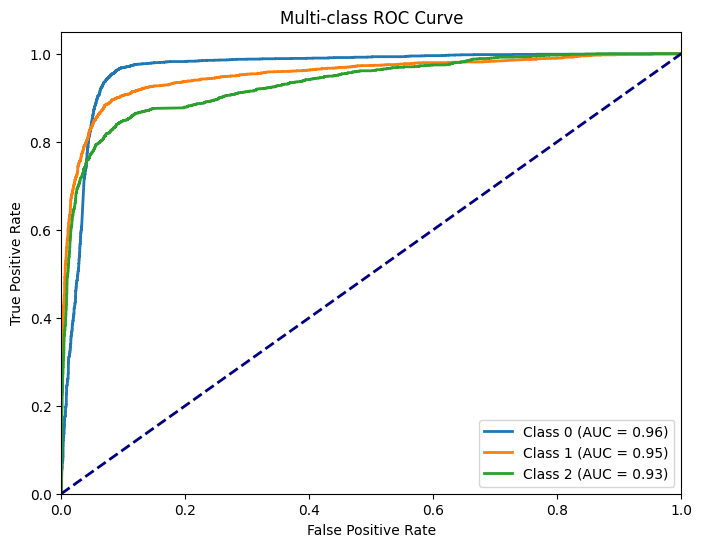

Macro AUC: 0.9490
Weighted AUC: 0.9514


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])

# Map labels: -1 → 2, 0 → 0, 1 → 1
df['category'] = df['category'].map({-1: 2, 0: 0, 1: 1})

X_raw = df['clean_comment']
y_raw = df['category']

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1, 3)
max_features = 7000

tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# -----------------------------
# 4️⃣ Handle class imbalance using SMOTE (training set only)
# -----------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# -----------------------------
# 5️⃣ Define Logistic Regression with class weights
# -----------------------------
model = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 6️⃣ Train the model
# -----------------------------
model.fit(X_train_resampled, y_train_resampled)

# -----------------------------
# 7️⃣ Predict and evaluate
# -----------------------------
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0,1,2]))

# -----------------------------
# 8️⃣ ROC and AUC for multi-class
# -----------------------------
# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = model.predict_proba(X_test_tfidf)

n_classes = y_test_bin.shape[1]

# Plot ROC curves
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Compute macro and weighted AUC
macro_auc = roc_auc_score(y_test_bin, y_score, average='macro')
weighted_auc = roc_auc_score(y_test_bin, y_score, average='weighted')
print(f"Macro AUC: {macro_auc:.4f}")
print(f"Weighted AUC: {weighted_auc:.4f}")


c:\Users\apoor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\apoor\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2529
           1       0.95      0.91      0.93      3154
           2       0.88      0.88      0.88      1650

    accuracy                           0.92      7333
   macro avg       0.91      0.92      0.92      7333
weighted avg       0.92      0.92      0.92      7333



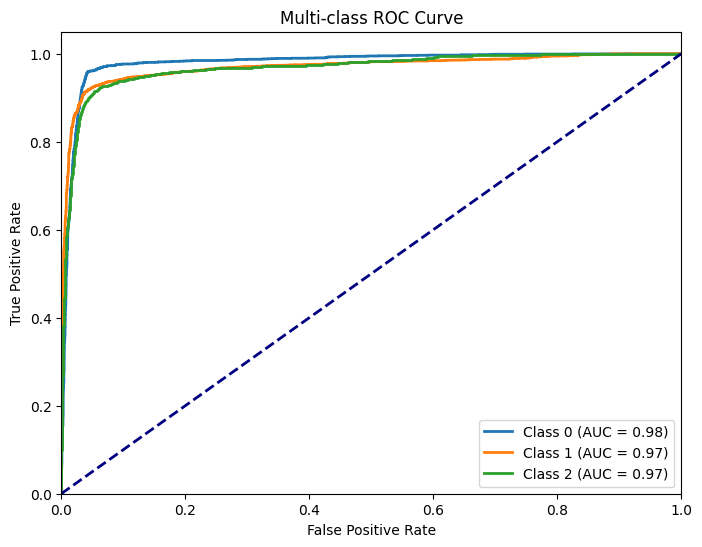

Macro AUC: 0.9722
Weighted AUC: 0.9725


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from textblob import TextBlob
from scipy.sparse import hstack

# -----------------------------
# 1️⃣ Load and clean dataset
# -----------------------------
df = pd.read_csv(r'D:\datascience\campusx\PROJECTS\Second_project\cleaned_data.csv', index_col=0)
df = df.dropna(subset=['clean_comment', 'category'])
df['category'] = df['category'].map({-1: 2, 0: 0, 1: 1})

X_raw = df['clean_comment']
y_raw = df['category']

# -----------------------------
# 2️⃣ Train-test split
# -----------------------------
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# -----------------------------
# 3️⃣ Feature Engineering
# -----------------------------
def create_text_features(series):
    return pd.DataFrame({
        'comment_length': series.apply(len),
        'word_count': series.apply(lambda x: len(x.split())),
        'unique_word_count': series.apply(lambda x: len(set(x.split()))),
        'num_exclamations': series.apply(lambda x: x.count('!')),
        'num_questions': series.apply(lambda x: x.count('?')),
        'sentiment': series.apply(lambda x: TextBlob(x).sentiment.polarity)
    })

# Training and test extra features
X_train_extra = create_text_features(X_train_raw)
X_test_extra  = create_text_features(X_test_raw)

scaler = StandardScaler()
X_train_extra_scaled = scaler.fit_transform(X_train_extra)
X_test_extra_scaled  = scaler.transform(X_test_extra)

# -----------------------------
# 4️⃣ TF-IDF vectorization
# -----------------------------
ngram_range = (1,3)
max_features = 7000
tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)

X_train_tfidf = tfidf.fit_transform(X_train_raw)
X_test_tfidf  = tfidf.transform(X_test_raw)

# Combine TF-IDF and extra features
X_train_combined = hstack([X_train_tfidf, X_train_extra_scaled])
X_test_combined  = hstack([X_test_tfidf, X_test_extra_scaled])

# -----------------------------
# 5️⃣ Handle class imbalance with SMOTE
# -----------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_combined, y_train)

# -----------------------------
# 6️⃣ Logistic Regression with class weights
# -----------------------------
model = LogisticRegression(
    C=1.63,
    penalty='l1',
    solver='liblinear',
    multi_class='ovr',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# Train
model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred = model.predict(X_test_combined)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=[0,1,2]))

# -----------------------------
# 7️⃣ ROC & AUC
# -----------------------------
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = model.predict_proba(X_test_combined)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.show()

macro_auc = roc_auc_score(y_test_bin, y_score, average='macro')
weighted_auc = roc_auc_score(y_test_bin, y_score, average='weighted')
print(f"Macro AUC: {macro_auc:.4f}")
print(f"Weighted AUC: {weighted_auc:.4f}")


In [2]:
from sklearn.metrics import accuracy_score, f1_score

# -----------------------------
# 🔍 8️⃣ Check Overfitting / Underfitting
# -----------------------------

# Training predictions
y_train_pred = model.predict(X_train_combined)

# Metrics for training
train_acc = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Metrics for testing (already have y_pred from before)
test_acc = accuracy_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred, average='weighted')

print("\n📊 Model Performance Comparison")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing Accuracy  : {test_acc:.4f}")
print(f"Training F1-score : {train_f1:.4f}")
print(f"Testing F1-score  : {test_f1:.4f}")

# Rule of thumb for interpretation
if abs(train_acc - test_acc) > 0.1:
    print("\n⚠️ Possible Overfitting (large gap between train and test performance).")
elif train_acc < 0.70 and test_acc < 0.70:
    print("\n⚠️ Possible Underfitting (low performance on both train and test).")
else:
    print("\n✅ Model seems well-balanced (no major signs of over/underfitting).")



📊 Model Performance Comparison
Training Accuracy : 0.9420
Testing Accuracy  : 0.9217
Training F1-score : 0.9421
Testing F1-score  : 0.9216

✅ Model seems well-balanced (no major signs of over/underfitting).


In [ ]:
import re
import numpy as np
from textblob import TextBlob
from scipy.sparse import hstack

# -----------------------------
# Preprocessing function
# -----------------------------
def preprocess_comment(comment):
    comment = comment.lower()
    comment = re.sub(r"http\S+|www\S+|https\S+", '', comment)
    comment = re.sub(r'\W', ' ', comment)
    comment = re.sub(r'\s+', ' ', comment).strip()
    return comment

# -----------------------------
# Feature engineering for a single comment
# -----------------------------
def create_extra_features_for_comment(comment):
    return np.array([[
        len(comment),                        # comment_length
        len(comment.split()),                 # word_count
        len(set(comment.split())),            # unique_word_count
        comment.count('!'),                   # num_exclamations
        comment.count('?'),                   # num_questions
        TextBlob(comment).sentiment.polarity # sentiment polarity
    ]])

# -----------------------------
# Prediction function following your training order
# -----------------------------
def predict_sentiment(comment, tfidf_vectorizer, scaler, model):
    # 1️⃣ Preprocess
    cleaned = preprocess_comment(comment)
    
    # 2️⃣ TF-IDF features
    tfidf_feat = tfidf_vectorizer.transform([cleaned])
    
    # 3️⃣ Extra engineered features
    extra_feat = create_extra_features_for_comment(cleaned)
    extra_feat_scaled = scaler.transform(extra_feat)
    
    # 4️⃣ Combine features (TF-IDF + engineered)
    combined_feat = hstack([tfidf_feat, extra_feat_scaled])
    
    # 5️⃣ Predict class and probability
    pred_class = model.predict(combined_feat)[0]
    pred_proba = np.max(model.predict_proba(combined_feat))
    
    
    return {
        'sentiment_class': int(pred_class),  # 0, 1, 2
        'confidence': pred_proba,
            }

# -----------------------------
# Example usage
# -----------------------------


SyntaxError: ':' expected after dictionary key (2661847413.py, line 54)

In [37]:
df

,clean_comment,category
0,family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed thing buddhism teach,1
1,buddhism much lot compatible christianity especially considering sin suffering almost thing suffering caused wanting thing want going getting thing wrong way christian would mean wanting thing coincide god wanting thing coincide but without aid jesus buddhism could also seen proof god mighty omnipotence certainly christian lucky one christ side but everyone else well many christian believe god grace salvation buddhism god way showing grace upon others would also help study thing jesus said see buddha made similar claim rich man getting heaven joke basically advocating rid material possession fact distinctly remembered jesus making someone cry someone asked achieve salvation jesus replied live like buddhist roughly translated also point buddha rarely spoke anything god theory personally knew well enough leave jesus mohamed came later remember conflict difference opinion but education fun involving enlightening easier teach something prove right like intelligent design,1
2,seriously say thing first get complex explain normal people anyway dogmatic matter say see mechante post reason decide later life move buddhism suit identity though still get keep wisdom family treat like went weird hippy phase didncha never hear end pro tip put one wall jpg,2
3,learned want teach different focus goal not wrapping paper buddhism passed others without word buddha,0
4,benefit may want read living buddha living christ thich nhat hanh might find subsequent discussion loved one easier able articulate parallel exist buddhism christianity surprised react negatively lost treat compassion deserved understanding although may indeed display sign hurt new path properly sharing way may alleviate fear something may perceive wrong least alien belief may help allowing long run accept although not necessarily agree decision regardless end make way,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab saal khatam hone hai sala tune bhi chutiya bana diya,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [39]:
# Example usage:
comment1 = "I absolutely hate this video!"
comment2 = "The explanations were confusing and the video quality was poor."
comment3 = "I didn’t learn anything useful. Really disappointed."
comment4 = "Wow, the explanation was so clear and helpful. Definitely subscribing!"
comment5 = "This is the worst video I’ve seen on this topic, very misleading"
comment6 = "Not much to say about this, just a standard video."
comment7 = "The video is okay, but I expected more depth in the content."
comment8 = "Superb content! Mazaa aa gaya dekh ke. Best video on this topic!"
comment9 = "Poor video quality aur explanation bhi weak tha."
comment10 = "The explanations were confusing and the video quality was poor"
test="downvote karna tha par upvote hogaya	"
result = predict_sentiment(test, tfidf, scaler, model)
print(f"Predicted Sentiment: {result['sentiment_class']}, Confidence: {result['confidence']:.2f}")


Predicted Sentiment: 0, Confidence: 0.91


c:\Users\apoor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
